In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
# torchvision 的输出是[0,1]的PILImage图像，我们把它转换为归一化范围为[-1,1]的张量

In [3]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,
                                     download=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,
                                       shuffle=True,num_workers=2)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,
                                    download=True,transform=transform)
testloader=torch.utils.data.DataLoader(testset,batch_size=4,
                                            shuffle=False,num_workers=2)
classes=('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


170500096it [2:39:41, 17794.73it/s]                               
170500096it [2:39:41, 17794.71it/s]                               


  cat  bird truck   car


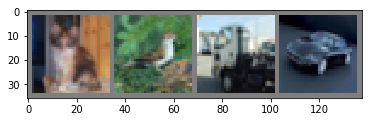

In [5]:
import matplotlib.pyplot as plt
import numpy as np
# 展示图像的函数
def imshow(img):
    img=img/2 + 0.5
    nping=img.numpy()
    plt.imshow(np.transpose(nping,(1,2,0)))
# 获取随机数据
dataiter=iter(trainloader)
images,labels=dataiter.next()
# 展示图像
imshow(torchvision.utils.make_grid(images))
# 显示图像标签
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1=nn.Conv2d(3,6,5)
        self.pool=nn.MaxPool2d(2,2)
        self.conv2=nn.Conv2d(6,16,5)
        self.fc1=nn.Linear(16*5*5,120)
        self.fc2=nn.Linear(120,84)
        self.fc3=nn.Linear(84,10)
    def forward(self,x):
        x=self.pool(F.relu(self.conv1(x)))
        x=self.pool(F.relu(self.conv2(x)))
        x=x.view(-1,16*5*5)
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
net=Net()
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

In [1]:
# 训练网络
for epoch in range(10):
    # 多批次循环
    running_loss=0.0
    for i,data in enumerate(trainloader,0):
        inputs,labels=data  #获取输入
        optimizer.zero_grad() # 梯度置0
        # 正向传播，反向传播，优化
        outputs=net(inputs)
        loss=criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        # 打印状态信息
        running_loss+=loss.item()
        if i%3125==0:
            print('[%d,%5d] loss: %.3f'%(epoch+1,i,running_loss/3125))
            running_loss=0.0
print('Finished Training')

NameError: name 'trainloader' is not defined

170500096it [3:14:08, 14637.55it/s]                               
170500096it [3:14:08, 14637.54it/s]                               


GroundTruth:    cat  ship  ship plane
Predicted:    cat   dog truck horse


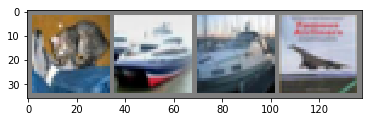

In [35]:
dataiter=iter(testloader)
images,labels=dataiter.next()
imshow(torchvision.utils.make_grid(images)) # 显示图片
print('GroundTruth: ',' '.join('%5s' % classes[labels[j]] for j in range(4)))
output=net(images)
_,predicted=torch.max(outputs,1)
print('Predicted: ',' '.join('%5s' % classes[predicted[j]] for j in range(4)))

In [34]:
# 整体在测试集上的结果
correct=0
total=0
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct += (predicted==labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % 
      (100*correct/total))

170500096it [3:13:57, 14650.84it/s]                               
170500096it [3:13:57, 14650.83it/s]                               


Accuracy of the network on the 10000 test images: 61 %


In [36]:
# 识别哪一类好
class_correct=list(0. for i in range(10))
class_total=list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images,labels=data
        outputs=net(images)
        _,predicted=torch.max(outputs,1)
        c=(predicted==labels).squeeze()
        for i in range(4):
            label=labels[i]
            class_correct[label] += c[i].item()
            class_total[label] +=1
for i in range(10):
    print('Accuracy of %5s : %2d %%'%(classes[i],100*class_correct[i]/class_total[i]))

170500096it [3:14:18, 14624.47it/s]                               
170500096it [3:14:18, 14624.46it/s]                               


Accuracy of plane : 69 %
Accuracy of   car : 80 %
Accuracy of  bird : 53 %
Accuracy of   cat : 48 %
Accuracy of  deer : 48 %
Accuracy of   dog : 62 %
Accuracy of  frog : 61 %
Accuracy of horse : 61 %
Accuracy of  ship : 65 %
Accuracy of truck : 67 %


In [37]:
device=torch.device('cuda:0' if torch.cuda.is_available() else "cpu")
print(device)

cuda:0
